# Intial Setup

* LGD : Loss Given Default
* EAD : Exposure At Default

* EL = PD * LGD * EAD = PD * (1- recovery rate) * (CCF *   funding amount)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data = pd.read_csv('../support files/loan_data_2007-2014/loan_data_2007_2014.csv')
loan_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20356\3965835643.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('../support files/loan_data_2007-2014/loan_data_2007_2014.csv')


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing few continuous variables

In [3]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year','')
loan_data['emp_length_int'].fillna('0',inplace=True)

In [4]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
loan_data['emp_length_int'][0].dtype

dtype('int64')

In [5]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [6]:
type(loan_data['earliest_cr_line_date'][0])
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [7]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [8]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()

C:\Users\Admin\AppData\Local\Temp\ipykernel_20356\849660455.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line'] < 0] = loan_data['mths_since_earliest_cr_line'].max()


In [9]:
loan_data['term_int'] = loan_data['term'].replace(' 60 months', 60)
loan_data['term_int'] = loan_data['term_int'].replace(' 36 months',36)
loan_data['term_int'].unique()

array([36, 60], dtype=int64)

In [10]:
loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'], format= '%b-%y')
loan_data['issue_date'].unique()

<DatetimeArray>
['2011-12-01 00:00:00', '2011-11-01 00:00:00', '2011-10-01 00:00:00',
 '2011-09-01 00:00:00', '2011-08-01 00:00:00', '2011-07-01 00:00:00',
 '2011-06-01 00:00:00', '2011-05-01 00:00:00', '2011-04-01 00:00:00',
 '2011-03-01 00:00:00', '2011-02-01 00:00:00', '2011-01-01 00:00:00',
 '2010-12-01 00:00:00', '2010-11-01 00:00:00', '2010-10-01 00:00:00',
 '2010-09-01 00:00:00', '2010-08-01 00:00:00', '2010-07-01 00:00:00',
 '2010-06-01 00:00:00', '2010-05-01 00:00:00', '2010-04-01 00:00:00',
 '2010-03-01 00:00:00', '2010-02-01 00:00:00', '2010-01-01 00:00:00',
 '2009-12-01 00:00:00', '2009-11-01 00:00:00', '2009-10-01 00:00:00',
 '2009-09-01 00:00:00', '2009-08-01 00:00:00', '2009-07-01 00:00:00',
 '2009-06-01 00:00:00', '2009-05-01 00:00:00', '2009-04-01 00:00:00',
 '2009-03-01 00:00:00', '2009-02-01 00:00:00', '2009-01-01 00:00:00',
 '2008-12-01 00:00:00', '2008-11-01 00:00:00', '2008-10-01 00:00:00',
 '2008-09-01 00:00:00', '2008-08-01 00:00:00', '2008-07-01 00:00:00',
 '20

In [11]:
pd.to_datetime('2017-12-01') - loan_data['issue_date']

0        2192 days
1        2192 days
2        2192 days
3        2192 days
4        2192 days
            ...   
466280   1430 days
466281   1430 days
466282   1430 days
466283   1430 days
466284   1430 days
Name: issue_date, Length: 466285, dtype: timedelta64[ns]

In [12]:
loan_data['months_issue_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01')- loan_data['issue_date'])/np.timedelta64(1,'M')))
loan_data['months_issue_date'].unique()
loan_data['months_issue_date'].describe()
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

In [13]:
loan_data_dummies = [pd.get_dummies(loan_data['grade'],dtype=int,prefix='Grade',prefix_sep=':'),
                     pd.get_dummies(loan_data['sub_grade'],dtype=int,prefix='sub_grade',prefix_sep=':'),
                     pd.get_dummies(loan_data['home_ownership'],dtype=int,prefix='home_ownership',prefix_sep=' '),
                     pd.get_dummies(loan_data['verification_status'],dtype=int,prefix='verification_status',prefix_sep=':'),
                    pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'],dtype=int,prefix='purpose',prefix_sep=':'),
                     pd.get_dummies(loan_data['addr_state'],dtype=int,prefix='addr_state',prefix_sep=':'),
                     pd.get_dummies(loan_data['initial_list_status'],dtype=int,prefix='initial_list_status',prefix_sep=':')]
loan_data_dummies

[        Grade:A  Grade:B  Grade:C  Grade:D  Grade:E  Grade:F  Grade:G
 0             0        1        0        0        0        0        0
 1             0        0        1        0        0        0        0
 2             0        0        1        0        0        0        0
 3             0        0        1        0        0        0        0
 4             0        1        0        0        0        0        0
 ...         ...      ...      ...      ...      ...      ...      ...
 466280        0        0        1        0        0        0        0
 466281        0        0        0        1        0        0        0
 466282        0        0        0        1        0        0        0
 466283        1        0        0        0        0        0        0
 466284        0        0        0        1        0        0        0
 
 [466285 rows x 7 columns],
         sub_grade:A1  sub_grade:A2  sub_grade:A3  sub_grade:A4  sub_grade:A5   
 0                  0             0  

In [14]:
loan_data_dummies = pd.concat(loan_data_dummies,axis=1)

In [15]:
loan_data = pd.concat([loan_data, loan_data_dummies],axis=1)

In [16]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [17]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)

In [18]:
loan_data['total_rev_hi_lim'].isnull().sum()
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)

In [19]:
loan_data_preprocessed_backup = loan_data

In [20]:
loan_data_preprocessed = loan_data

In [21]:
loan_data_preprocessed.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0,0,0,0,0,0,0,0,1,0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,0,0,0,0,0,0,0,0,1,0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0,0,0,0,0,0,0,0,1,0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0,0,0,0,0,0,0,0,1,0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0,0,0,0,0,0,0,0,1,0


In [22]:
loan_data_preprocessed['loan_status'].value_counts()

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [23]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off'])]

In [24]:
loan_data_defaults.shape

(43236, 207)

In [25]:
pd.options.display.max_rows = None

In [26]:
loan_data_defaults.isnull().sum()

Unnamed: 0                                                             0
id                                                                     0
member_id                                                              0
loan_amnt                                                              0
funded_amnt                                                            0
funded_amnt_inv                                                        0
term                                                                   0
int_rate                                                               0
installment                                                            0
grade                                                                  0
sub_grade                                                              0
emp_title                                                           3287
emp_length                                                          2337
home_ownership                                     

`Here we only need two variable` 
* mths_since_last_delinq 
* mths_since_last_record

` For LGD and EAD models we don't need fine classing or coarse classing for variables.`

## Independent variables

In [27]:
loan_data_defaults['mths_since_last_delinq'].fillna(0,inplace=True)
loan_data_defaults['mths_since_last_record'].fillna(0,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20356\2055924607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_delinq'].fillna(0,inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20356\2055924607.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_record'].fillna(0,inplace=True)


## Dependent variables

* EL = PD * LGD *EAD

In [28]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

C:\Users\Admin\AppData\Local\Temp\ipykernel_20356\2670870593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']


In [29]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060820
std          0.089770
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.220774
Name: recovery_rate, dtype: float64

> As the recovery_rate max is more than 1, it is not good for model it should be 0 to 1 (it's like in percentage).
> So, we update the values of it by more than 1 we replace it by 1 and less than 0 by 0

In [30]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] >1,1,loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] <0,0,loan_data_defaults['recovery_rate'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_20356\1724400159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] >1,1,loan_data_defaults['recovery_rate'])
C:\Users\Admin\AppData\Local\Temp\ipykernel_20356\1724400159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] <0,0,loan_data_defaults['recovery_rate'])


In [31]:
loan_data_defaults['recovery_rate'].describe()

count    43236.000000
mean         0.060770
std          0.089202
min          0.000000
25%          0.000000
50%          0.029466
75%          0.114044
max          1.000000
Name: recovery_rate, dtype: float64

* EAD = total funded amount * credit conversion factor

In [32]:
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']

C:\Users\Admin\AppData\Local\Temp\ipykernel_20356\1145321474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']


In [33]:
loan_data_defaults['CCF'].describe()

count    43236.000000
mean         0.735952
std          0.200742
min          0.000438
25%          0.632088
50%          0.789908
75%          0.888543
max          1.000000
Name: CCF, dtype: float64

In [34]:
loan_data_defaults.to_csv('loan_data_defaults.csv')

# Explore dependent variables

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Recovery Rate

(array([2.1023e+04, 1.8370e+03, 3.8730e+03, 1.3940e+03, 2.1330e+03,
        3.3440e+03, 4.7650e+03, 1.7130e+03, 1.1790e+03, 4.0600e+02,
        3.4100e+02, 2.7400e+02, 1.1700e+02, 9.3000e+01, 8.1000e+01,
        7.3000e+01, 5.4000e+01, 7.2000e+01, 5.7000e+01, 3.0000e+01,
        4.7000e+01, 2.7000e+01, 1.7000e+01, 1.5000e+01, 2.0000e+01,
        2.3000e+01, 1.7000e+01, 7.0000e+00, 1.1000e+01, 7.0000e+00,
        8.0000e+00, 7.0000e+00, 7.0000e+00, 8.0000e+00, 7.0000e+00,
        1.0000e+01, 6.0000e+00, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 3.0000e+00, 9.0000e+00,
        9.0000e+00, 1.5000e+01, 8.0000e+00, 9.0000e+00, 3.3000e+01]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.

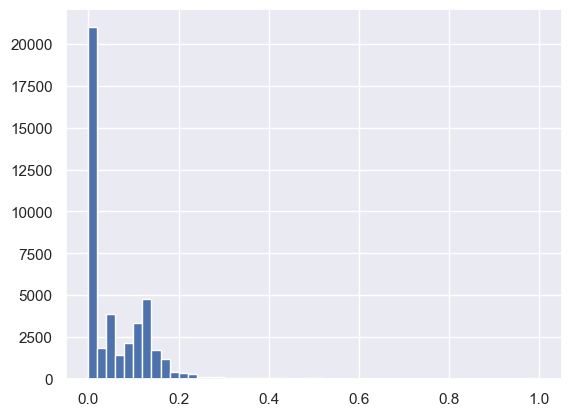

In [36]:
plt.hist(loan_data_defaults['recovery_rate'], bins=50)

In [37]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] ==0,0,1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_20356\2603919375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] ==0,0,1)


## CCF

(array([   3.,   17.,   16.,   44.,   16.,   13.,   71.,   26.,    7.,
          63.,   67.,   17.,   60.,   90.,   23.,   55.,   82.,   42.,
          47.,  123.,   82.,   70.,  122.,   86.,   89.,  110.,  117.,
         111.,  122.,  120.,  135.,  141.,  154.,  146.,  160.,  175.,
         152.,  187.,  202.,  174.,  204.,  208.,  210.,  211.,  241.,
         264.,  281.,  224.,  308.,  267.,  287.,  296.,  340.,  274.,
         365.,  370.,  392.,  364.,  393.,  419.,  411.,  429.,  445.,
         497.,  481.,  478.,  569.,  568.,  599.,  618.,  727.,  691.,
         626.,  805.,  804.,  776.,  881.,  851.,  916.,  934.,  925.,
        1078.,  933., 1218., 1041., 1082., 1336., 1040., 1374., 1073.,
        1406., 1287.,  952., 1414.,  795., 1320.,  578.,  949.,  343.,
         531.]),
 array([4.3800000e-04, 1.0433620e-02, 2.0429240e-02, 3.0424860e-02,
        4.0420480e-02, 5.0416100e-02, 6.0411720e-02, 7.0407340e-02,
        8.0402960e-02, 9.0398580e-02, 1.0039420e-01, 1.1038982e-01

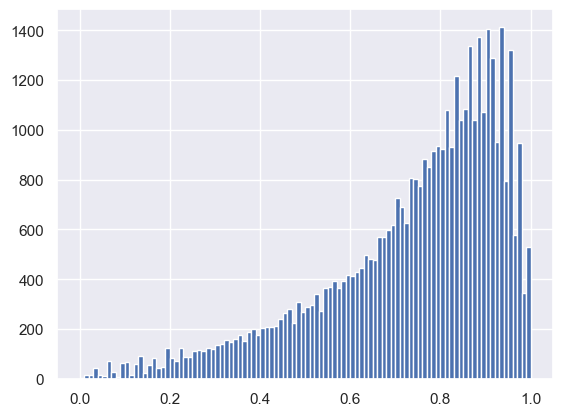

In [38]:
plt.hist(loan_data_defaults['CCF'], bins=100)

# LGD Model

## Splitting Data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test  = train_test_split(loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1','CCF'],axis=1),loan_data_defaults['recovery_rate_0_1'],test_size=0.2,random_state=42)

In [41]:
lgd_targets_stage_1_test.head()

178928    1
69814     1
101396    0
463268    1
253729    0
Name: recovery_rate_0_1, dtype: int32

## Preparing the Inputs

In [42]:
features_all = [
'Grade:A',
'Grade:B',
'Grade:C',
'Grade:D',
'Grade:E',
'Grade:F',
'Grade:G',
'home_ownership MORTGAGE',
'home_ownership NONE',
'home_ownership OTHER',
'home_ownership OWN',
'home_ownership RENT',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:car',
'purpose:credit_card',
'purpose:debt_consolidation',
'purpose:educational',
'purpose:home_improvement',
'purpose:house',
'purpose:major_purchase',
'purpose:medical',
'purpose:moving',
'purpose:other',
'purpose:renewable_energy',
'purpose:small_business',
'purpose:vacation',
'purpose:wedding',
'initial_list_status:f',
'initial_list_status:w',
'term_int',
'emp_length_int',
'months_issue_date',
'mths_since_earliest_cr_line',
'funded_amnt',
'int_rate',
'installment',
'annual_inc',
'dti',
'delinq_2yrs',
'inq_last_6mths',
'mths_since_last_delinq',
'mths_since_last_record',
'open_acc',
'pub_rec',
'total_acc',
'acc_now_delinq',
'total_rev_hi_lim']
# List of all independent variables for the models.

In [43]:
features_reference_cat = ['Grade:G',
'home_ownership RENT',
'verification_status:Verified',
'purpose:credit_card',
'initial_list_status:f']
# List of the dummy variable reference categories. 

In [44]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]

In [45]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis = 1)

In [46]:
lgd_inputs_stage_1_train.isnull().sum()

Grade:A                                0
Grade:B                                0
Grade:C                                0
Grade:D                                0
Grade:E                                0
Grade:F                                0
home_ownership MORTGAGE                0
home_ownership NONE                    0
home_ownership OTHER                   0
home_ownership OWN                     0
verification_status:Not Verified       0
verification_status:Source Verified    0
purpose:car                            0
purpose:debt_consolidation             0
purpose:educational                    0
purpose:home_improvement               0
purpose:house                          0
purpose:major_purchase                 0
purpose:medical                        0
purpose:moving                         0
purpose:other                          0
purpose:renewable_energy               0
purpose:small_business                 0
purpose:vacation                       0
purpose:wedding 

## Estimating the Model

In [47]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values :
    def __init__(self, *args, **kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0+np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0]/sigma_estimates
        p_values = [stat.norm.sf(abs(x))*2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [48]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
reg_lgd_st_1.fit(lgd_inputs_stage_1_train,lgd_targets_stage_1_train)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
feature_name = lgd_inputs_stage_1_train.columns.values

In [50]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_1.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-2.239418e-04,NaN
1,Grade:A,-2.767092e-05,9.997431e-01
2,Grade:B,-1.499910e-04,9.982735e-01
3,Grade:C,-2.748762e-04,9.967143e-01
4,Grade:D,3.101465e-05,9.996436e-01
5,Grade:E,2.711704e-05,9.997174e-01
6,Grade:F,1.466374e-04,9.986699e-01
7,home_ownership MORTGAGE,-7.056873e-05,9.978044e-01
8,home_ownership NONE,1.772647e-06,9.999982e-01
9,home_ownership OTHER,7.731990e-07,9.999985e-01


> most of them aren't statistically significant, So it not affects the model to prediction. So, we don't consider it.

## Test Model

In [51]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]

In [52]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis=1)

In [53]:
y_hat_test_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)

In [54]:
y_hat_test_lgd_stage_1

array([1, 1, 0, ..., 1, 1, 0])

In [55]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)

In [56]:
y_hat_test_proba_lgd_stage_1

array([[0.42388553, 0.57611447],
       [0.38323928, 0.61676072],
       [0.52807521, 0.47192479],
       ...,
       [0.45761135, 0.54238865],
       [0.39916754, 0.60083246],
       [0.52139882, 0.47860118]])

In [57]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[:][:,1]

In [58]:
y_hat_test_proba_lgd_stage_1

array([0.57611447, 0.61676072, 0.47192479, ..., 0.54238865, 0.60083246,
       0.47860118])

In [59]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test

In [60]:
lgd_targets_stage_1_test_temp.reset_index(drop=True, inplace=True)

In [61]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)],axis=1)

In [62]:
df_actual_predicted_probs.head()

,recovery_rate_0_1,0
0,1,0.576114
1,1,0.616761
2,0,0.471925
3,1,0.513583
4,0,0.419910


In [63]:
df_actual_predicted_probs.columns = ['lgd_targest_stage_1_test','y_hat_test_proba_lgd_stage_1']

In [64]:
df_actual_predicted_probs.head()

,lgd_targest_stage_1_test,y_hat_test_proba_lgd_stage_1
0,1,0.576114
1,1,0.616761
2,0,0.471925
3,1,0.513583
4,0,0.419910


## Estimating the accuracy of the model

In [65]:
tr = 0.5
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1']>tr,1,0)

In [66]:
pd.crosstab(df_actual_predicted_probs['lgd_targest_stage_1_test'],df_actual_predicted_probs['y_hat_test_lgd_stage_1'],rownames=['Actual'],colnames=['Predicated'])

Predicated,0,1
Actual,,
0,1433,2329
1,1003,3883


In [67]:
pd.crosstab(df_actual_predicted_probs['lgd_targest_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.165703,0.269311
1,0.115981,0.449006


In [68]:
(pd.crosstab(df_actual_predicted_probs['lgd_targest_stage_1_test'], df_actual_predicted_probs['lgd_targest_stage_1_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['lgd_targest_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.8840194264569843

In [69]:
from sklearn.metrics import roc_curve, roc_auc_score

In [70]:
fpr , tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targest_stage_1_test'],df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

Text(0.5, 1.0, 'ROC Curve')

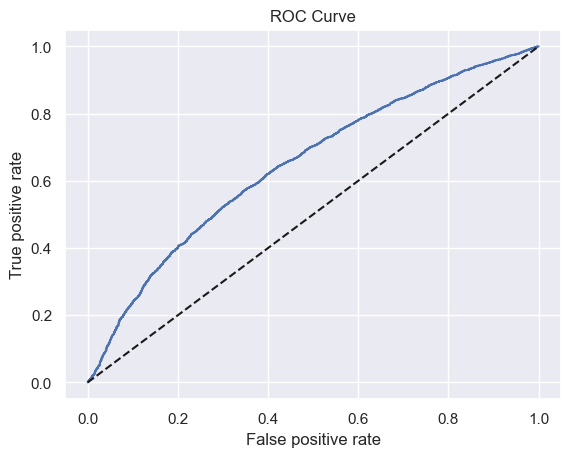

In [71]:
plt.plot(fpr,tpr)
plt.plot(fpr, fpr, linestyle ='--',color='k')
plt.xlabel("False positive rate")
plt.ylabel('True positive rate')
plt.title('ROC Curve')

In [72]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targest_stage_1_test'],df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUROC

0.6486016748043593

# Saving the Model

In [73]:
import pickle

In [74]:
pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.sav','wb'))

In [75]:
loan_data_defaults['recovery_rate_0_1'].head()

1     1
8     1
9     1
12    1
14    1
Name: recovery_rate_0_1, dtype: int32

# Stage 2 - Linear Regression

In [76]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1']==1]

In [77]:
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['recovery_rate','recovery_rate_0_1', 'CCF'], axis = 1), lgd_stage_2_data['recovery_rate'], test_size = 0.2, random_state = 42)

In [78]:
lgd_inputs_stage_1_train.head()

,Grade:A,Grade:B,Grade:C,Grade:D,Grade:E,Grade:F,home_ownership MORTGAGE,home_ownership NONE,home_ownership OTHER,home_ownership OWN,...,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,total_acc,acc_now_delinq,total_rev_hi_lim
165859,0,0,0,1,0,0,0,0,0,0,...,26.31,0.0,2.0,0.0,0.0,17.0,0.0,34.0,0.0,13700.0
213563,0,0,1,0,0,0,0,0,0,0,...,27.21,0.0,3.0,0.0,0.0,11.0,0.0,13.0,0.0,3000.0
182682,0,0,0,1,0,0,0,0,0,0,...,20.33,0.0,1.0,0.0,0.0,7.0,0.0,38.0,0.0,14600.0
81769,0,0,1,0,0,0,1,0,0,0,...,17.31,0.0,0.0,0.0,68.0,12.0,2.0,30.0,0.0,5800.0
74862,0,0,0,0,1,0,0,0,0,0,...,24.28,0.0,0.0,72.0,0.0,13.0,0.0,35.0,0.0,15900.0


In [79]:
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score

In [80]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True,n_jobs=1):
        super().__init__(fit_intercept=fit_intercept, copy_X=copy_X, n_jobs=n_jobs)
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs
    def fit(self, X, y, n_jobs=1):
        self = super(LinearRegression, self).fit(X, y, n_jobs)
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t = self.coef_ / se
        self.p = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t), y.shape[0] - X.shape[1])))
        return self

In [81]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]

In [82]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat,axis=1)

In [83]:
reg_lgd_st_2 = LinearRegression()
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

LinearRegression()

In [84]:
feature_name = lgd_inputs_stage_2_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [85]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
p_values = reg_lgd_st_2.p
# We take the result of the newly added method 'p_values' and store it in a variable 'p_values'.
p_values = np.append(np.nan,np.array(p_values))
# We add the value 'NaN' in the beginning of the variable with p-values.
summary_table['p_values'] = p_values.round(3)
# In the 'summary_table' dataframe, we add a new column, called 'p_values', containing the values from the 'p_values' variable.
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.409222e-01,NaN
1,Grade:A,-6.804653e-02,0.000
2,Grade:B,-5.067942e-02,0.000
3,Grade:C,-3.739224e-02,0.000
4,Grade:D,-2.712438e-02,0.000
5,Grade:E,-1.314241e-02,0.002
6,Grade:F,-5.230491e-03,0.277
7,home_ownership MORTGAGE,2.832918e-03,0.060
8,home_ownership NONE,1.461056e-01,0.000
9,home_ownership OTHER,-9.396799e-03,0.646


In [86]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values.round(3)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,2.409222e-01,NaN
1,Grade:A,-6.804653e-02,0.000
2,Grade:B,-5.067942e-02,0.000
3,Grade:C,-3.739224e-02,0.000
4,Grade:D,-2.712438e-02,0.000
5,Grade:E,-1.314241e-02,0.002
6,Grade:F,-5.230491e-03,0.277
7,home_ownership MORTGAGE,2.832918e-03,0.060
8,home_ownership NONE,1.461056e-01,0.000
9,home_ownership OTHER,-9.396799e-03,0.646


## Linear Regression Evaluation

In [87]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]

In [88]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat,axis=1)

In [89]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)

In [90]:
lgd_targets_stage_2_test_temp = lgd_targets_stage_2_test.reset_index(drop=True)

In [91]:
pd.concat([lgd_targets_stage_2_test_temp,pd.DataFrame(y_hat_test_lgd_stage_2)], axis=1).corr()

,recovery_rate,0
recovery_rate,1.000000,0.309047
0,0.309047,1.000000


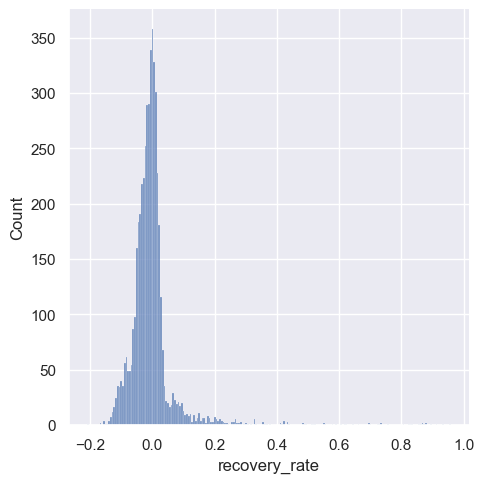

In [92]:
sns.displot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)

In [93]:
pickle.dump(reg_lgd_st_2,open('lgd_model_stage_2.sav','wb'))

#

In [94]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_1_test)

In [95]:
y_hat_test_lgd_stage_2_all

array([0.11902462, 0.09642583, 0.13368658, ..., 0.12050299, 0.11563043,
       0.15690616])

In [96]:
y_hat_test_lgd = y_hat_test_lgd_stage_1 * y_hat_test_lgd_stage_2_all

In [97]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.075028
std,0.052528
min,-0.008234
25%,0.000000
50%,0.092144
75%,0.116254
max,0.237000


In [98]:
y_hat_test_lgd = np.where(y_hat_test_lgd < 0, 0, y_hat_test_lgd)
y_hat_test_lgd = np.where(y_hat_test_lgd > 1, 1, y_hat_test_lgd)

In [99]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,8648.000000
mean,0.075031
std,0.052525
min,0.000000
25%,0.000000
50%,0.092144
75%,0.116254
max,0.237000


# EAD Model

In [100]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['recovery_rate','recovery_rate_0_1','CCF'],axis=1), loan_data_defaults['CCF'],test_size=0.2,random_state=42)

In [101]:
ead_inputs_train = ead_inputs_train[features_all]

In [102]:
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis=1)

In [103]:
ead_inputs_train['term_int'].unique()

array([36, 60], dtype=int64)

In [104]:
reg_ead = LinearRegression()
reg_ead.fit(ead_inputs_train, ead_targets_train)

LinearRegression()

In [105]:
feature_name = ead_inputs_train.columns.values

In [106]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_ead.p
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values.round(3)
summary_table

,Feature name,Coefficients,p_values
0,Intercept,1.107038e+00,NaN
1,Grade:A,-3.009354e-01,0.000
2,Grade:B,-2.348447e-01,0.000
3,Grade:C,-1.709003e-01,0.000
4,Grade:D,-1.190589e-01,0.000
5,Grade:E,-6.723635e-02,0.000
6,Grade:F,-2.022054e-02,0.005
7,home_ownership MORTGAGE,-6.335755e-03,0.003
8,home_ownership NONE,-5.027459e-03,0.938
9,home_ownership OTHER,-2.546560e-03,0.930


> Positive coefficients = Increase in the CCF (higher risk) || 
> Negative coefficients = Decrease in the CCF (lower risk)

## Model Validation

In [107]:
ead_inputs_test = ead_inputs_test[features_all]

In [108]:
ead_inputs_test = ead_inputs_test.drop(features_reference_cat,axis=1)

In [109]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)

In [110]:
ead_targets_test_temp = ead_targets_test

In [111]:
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop=True)

In [112]:
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)],axis=1).corr()

,CCF,0
CCF,1.000000,0.531285
0,0.531285,1.000000


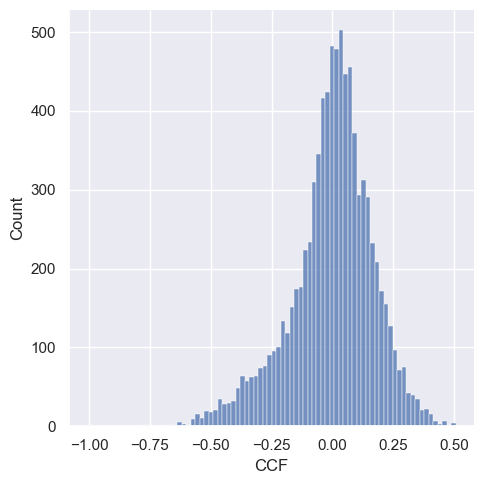

In [113]:
sns.displot(ead_targets_test - y_hat_test_ead)

In [114]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.736006
std,0.105324
min,0.384013
25%,0.661312
50%,0.731782
75%,0.810602
max,1.151939


In [115]:
y_hat_test_ead = np.where(y_hat_test_ead<0,0,y_hat_test_ead)
y_hat_test_ead = np.where(y_hat_test_ead>1,1,y_hat_test_ead)

In [116]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,8648.000000
mean,0.735987
std,0.105261
min,0.384013
25%,0.661312
50%,0.731782
75%,0.810602
max,1.000000


# Expected Loss

> EL = PD * LGD * EAD

In [117]:
loan_data_preprocessed.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0,0,0,0,0,0,0,0,1,0
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,0,0,0,0,0,0,0,0,1,0
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0,0,0,0,0,0,0,0,1,0
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0,0,0,0,0,0,0,0,1,0
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0,0,0,0,0,0,0,0,1,0


In [118]:
loan_data_preprocessed['mths_since_last_record'].isnull().value_counts()

mths_since_last_record
True     403647
False     62638
Name: count, dtype: int64

In [119]:
loan_data_preprocessed['mths_since_last_record'].fillna(0,inplace=True)
loan_data_preprocessed['mths_since_last_delinq'].fillna(0,inplace=True)

In [120]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]

In [121]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_reference_cat,axis=1)

In [122]:
loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)

In [123]:
loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)

In [124]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1'] * loan_data_preprocessed['recovery_rate_st_2']

In [125]:
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate']<0,0,loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate']>1,1,loan_data_preprocessed['recovery_rate'])

In [126]:
loan_data_preprocessed['recovery_rate'].describe()

count    466285.000000
mean          0.066746
std           0.058252
min           0.000000
25%           0.000000
50%           0.084250
75%           0.118875
max           0.637573
Name: recovery_rate, dtype: float64

In [127]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']

In [128]:
loan_data_preprocessed['LGD'].describe()

count    466285.000000
mean          0.933254
std           0.058252
min           0.362427
25%           0.881125
50%           0.915750
75%           1.000000
max           1.000000
Name: LGD, dtype: float64

In [129]:
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)

In [130]:
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF']<0,0,loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF']>1,1,loan_data_preprocessed['CCF'])

In [131]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF']*loan_data_preprocessed_lgd_ead['funded_amnt']

In [132]:
loan_data_preprocessed.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w,recovery_rate_st_1,recovery_rate_st_2,recovery_rate,LGD,CCF,EAD
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,0,0,1,0,1,0.085883,0.085883,0.914117,0.588772,2943.860059
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,0,0,1,0,1,0.084099,0.084099,0.915901,0.776507,1941.268368
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,0,0,1,0,1,0.080193,0.080193,0.919807,0.657455,1577.892265
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,0,0,1,0,1,0.094563,0.094563,0.905437,0.659145,6591.452793
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,0,0,1,0,1,0.088069,0.088069,0.911931,0.706868,2120.604693


In [133]:
loan_data_inputs_train= pd.read_csv('../pd_model/loan_data_inputs_train.csv')
loan_data_inputs_test= pd.read_csv('../pd_model/loan_data_inputs_test.csv')

In [134]:
loan_data_inputs_pd = pd.concat([loan_data_inputs_train,loan_data_inputs_test],axis=0)

In [135]:
loan_data_inputs_pd.shape

(466285, 326)

In [136]:
loan_data_inputs_pd.head()

,Unnamed: 0.1,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,...,dti:27.9-30.7,dti:30.7-34.7,dti:>34.7,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:2-12,mths_since_last_record:12-29,mths_since_last_record:29-33,mths_since_last_record:33-85,mths_since_last_record:>=85
0,427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,...,0,0,0,1,0,0,0,0,0,0
1,206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,...,0,0,0,1,0,0,0,0,0,0
2,136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,...,0,0,0,1,0,0,0,0,0,0
3,412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,...,0,0,0,1,0,0,0,0,0,0
4,36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,...,0,0,0,1,0,0,0,0,0,0


In [137]:
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')

In [138]:
loan_data_inputs_pd.head()

,Unnamed: 0.1,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,dti:27.9-30.7,dti:30.7-34.7,dti:>34.7,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:2-12,mths_since_last_record:12-29,mths_since_last_record:29-33,mths_since_last_record:33-85,mths_since_last_record:>=85
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
427211,427211,12796369,14818505,24000,24000,24000.0,36 months,8.90,762.08,A,...,0,0,0,1,0,0,0,0,0,0
206088,206088,1439740,1691948,10000,10000,10000.0,36 months,14.33,343.39,C,...,0,0,0,1,0,0,0,0,0,0
136020,136020,5214749,6556909,20425,20425,20425.0,36 months,8.90,648.56,A,...,0,0,0,1,0,0,0,0,0,0
412305,412305,13827698,15890016,17200,17200,17200.0,36 months,16.59,609.73,D,...,0,0,0,1,0,0,0,0,0,0
36159,36159,422455,496525,8400,8400,7450.0,36 months,12.84,282.40,C,...,0,0,0,1,0,0,0,0,0,0


In [139]:
features_all_pd = [
 "Grade:A",
"Grade:B",
"Grade:C",
"Grade:D",
"Grade:E",
"Grade:F",
"Grade:G",
"home_ownership:RENT_OTHER_NONE_ANY",
"home_ownership OWN",
"home_ownership MORTGAGE",
"addr_state:NV_LA",
"addr_state:HI_SD",
"addr_state:AZ_PA_OK",
"addr_state:MD_FL_VA_MA",
"addr_state:AR_DE_WV_MO_IN",
"addr_state:OH_NC",
"addr_state:AL_MI",
"addr_state:TX_NJ_GA",
"addr_state:AK_WI",
"addr_state:WA_CT",
"addr_state:NH_KS_DC_WY_ME_ID",
"addr_state:NE_IA_MS_MT_TN_RI_ND",
"addr_state:NY",
"addr_state:CA",
"addr_state:VT",
"verification_status:Verified",
"verification_status:Not Verified",
"verification_status:Source Verified",
"purpose:edu_small_house_mov",
"purpose:other_med",
"purpose:debt",
"purpose:_vaca_credit",
"purpose:major_rene_car_wedd",
"initial_list_status:f",
"initial_list_status:w",
"term_int:36",
"term_int:60",
"emp_length_int:0",
"emp_length_int:1",
"emp_length_int:2-3",
"emp_length_int:4-5",
"emp_length_int:6-8",
"emp_length_int:9",
"emp_length_int:10",
"months_issue_date:<38",
"months_issue_date:40-49",
"months_issue_date:49-56",
"months_issue_date:56-60",
"months_issue_date:60-66",
"months_issue_date:66-74",
"months_issue_date:74-82",
"months_issue_date:>82",
"int_rate:<7.071",
"int_rate:7.071-11.199",
"int_rate:11.199-13.263",
"int_rate:13.263-15.327",
"int_rate:15.327-19.868",
"int_rate:19.868-25.234",
"int_rate:>25.324",
"mths_since_earliest_cr_line_factor:<126",
"mths_since_earliest_cr_line_factor:126-173",
"mths_since_earliest_cr_line_factor:173-345",
"mths_since_earliest_cr_line_factor:345-438",
"mths_since_earliest_cr_line_factor:>438",
"inq_last_6mths:0-3",
"inq_last_6mths:3-6",
"inq_last_6mths:>6",
"acc_now_delinq:0",
"acc_now_delinq:>=1",
"annual_inc:<20K",
"annual_inc:20K-30K",
"annual_inc:30K-40K",
"annual_inc:40K-50K",
"annual_inc:50K-60K",
"annual_inc:60K-70K",
"annual_inc:70K-80K",
"annual_inc:80K-90K",
"annual_inc:90K-100K",
"annual_inc:100K-120K",
"annual_inc:120K-140K",
"annual_inc:>140K",
"mths_since_last_delinq:Missing",
"mths_since_last_delinq:0-3",
"mths_since_last_delinq:3-18",
"mths_since_last_delinq:18-30",
"mths_since_last_delinq:30-82",
"mths_since_last_delinq:>82",
"dti:<=1.2",
"dti:1.2-4.3",
"dti:4.3-13.9",
"dti:13.9-21.9",
"dti:21.9-27.9",
"dti:27.9-30.7",
"dti:30.7-34.7",
"dti:>34.7",
"mths_since_last_record:Missing",
"mths_since_last_record:0-2",
"mths_since_last_record:2-12",
"mths_since_last_record:12-29",
"mths_since_last_record:29-33",
"mths_since_last_record:33-85",
"mths_since_last_record:>=85",
]

In [140]:
ref_categories = ["Grade:G",
    "home_ownership:RENT_OTHER_NONE_ANY",
    "addr_state:NE_IA_MS_MT_TN_RI_ND",
    "verification_status:Verified",
    "purpose:edu_small_house_mov",
    "initial_list_status:f",
    "term_int:60",
    "emp_length_int:0",
    "months_issue_date:>82",
    "int_rate:>25.324",
    "mths_since_earliest_cr_line_factor:<126",
    "inq_last_6mths:>6",
    "acc_now_delinq:0",
    "annual_inc:<20K",
    "mths_since_last_delinq:0-3",
    "dti:>34.7",
    "mths_since_last_record:0-2",
    ]

In [141]:
loan_data_inputs_pd_temp = loan_data_inputs_pd[features_all_pd]

In [142]:
loan_data_inputs_pd_temp.columns.values

array(['Grade:A', 'Grade:B', 'Grade:C', 'Grade:D', 'Grade:E', 'Grade:F',
       'Grade:G', 'home_ownership:RENT_OTHER_NONE_ANY',
       'home_ownership OWN', 'home_ownership MORTGAGE',
       'addr_state:NV_LA', 'addr_state:HI_SD', 'addr_state:AZ_PA_OK',
       'addr_state:MD_FL_VA_MA', 'addr_state:AR_DE_WV_MO_IN',
       'addr_state:OH_NC', 'addr_state:AL_MI', 'addr_state:TX_NJ_GA',
       'addr_state:AK_WI', 'addr_state:WA_CT',
       'addr_state:NH_KS_DC_WY_ME_ID', 'addr_state:NE_IA_MS_MT_TN_RI_ND',
       'addr_state:NY', 'addr_state:CA', 'addr_state:VT',
       'verification_status:Verified', 'verification_status:Not Verified',
       'verification_status:Source Verified',
       'purpose:edu_small_house_mov', 'purpose:other_med', 'purpose:debt',
       'purpose:_vaca_credit', 'purpose:major_rene_car_wedd',
       'initial_list_status:f', 'initial_list_status:w', 'term_int:36',
       'term_int:60', 'emp_length_int:0', 'emp_length_int:1',
       'emp_length_int:2-3', 'emp_length_i

In [143]:
loan_data_inputs_pd_temp = loan_data_inputs_pd_temp.drop(ref_categories,axis=1)

In [144]:
import pickle

In [145]:
reg_pd = pickle.load(open('../pd_model/pd_model.sav','rb'))

In [176]:
loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(loan_data_inputs_pd_temp)[: ][:,0]

In [160]:
loan_data_inputs_pd['PD'].describe()

count    466285.000000
mean          0.018142
std           0.018557
min           0.000165
25%           0.007230
50%           0.014935
75%           0.024435
max           0.789300
Name: PD, dtype: float64

In [164]:
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd],axis=1)

In [165]:
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']

In [175]:
loan_data_preprocessed_new['EL'].describe()

count    466285.000000
mean        195.386976
std         243.146659
min           0.150093
25%          47.365848
50%         110.582939
75%         255.882919
max       11201.260138
Name: EL, dtype: float64

In [153]:
loan_data_preprocessed_new[['funded_amnt','PD','LGD','EAD','EL']].head()

,funded_amnt,funded_amnt,PD,LGD,EAD,EL
0,5000,5000,0.003054,0.914117,2943.860059,8.217450
1,2500,2500,0.006884,0.915901,1941.268368,12.240467
2,2400,2400,0.003393,0.919807,1577.892265,4.924550
3,10000,10000,0.003844,0.905437,6591.452793,22.942541
4,3000,3000,0.002677,0.911931,2120.604693,5.176161


In [156]:
loan_data_preprocessed_new['EL'].sum()

91106016.037322

In [157]:
loan_data_preprocessed_new['funded_amnt'].sum()

funded_amnt    6664052450
funded_amnt    6664052450
dtype: int64

In [158]:
loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()

funded_amnt    0.013671
funded_amnt    0.013671
dtype: float64